In [1]:
import torch

from torch.utils.data import random_split, DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms
from pathlib import Path

import matplotlib.pyplot as plt

import sys
sys.path.append("../src")
sys.path.append("../../dlflow")

from linear_classifier import Trainer, LinearModel, TempModel
from dlflow.logger import SimpleLogger
from dlflow.plotter import SimplePlotter

In [2]:
data_path = Path("../data")
logs_path = Path("../logs")
logs_path.mkdir(exist_ok=True)

config = {
    "batch_size": 64,
    "epochs": 20,
    "optimizer": {
        "name": "SGD",
        "lr": 0.01
    },
    "train_split": 42_000,
    "val_split": 8000,
}

In [3]:
logger = SimpleLogger(logs_path, experiment_name="FirstExperiment", config=config)
logger.init()

c:\Users\2185060\Dev\repos\ImageClassification\notebooks\..\dlflow\logger.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  run_names = torch.load(


In [4]:
dataset = CIFAR10(data_path, train=True, transform=transforms.ToTensor())

train_dataset, val_dataset = random_split(dataset, [config["train_split"], config["val_split"]])

train_dataloader = DataLoader(
    train_dataset, batch_size=config["batch_size"], shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=config["batch_size"])

## Single layer linear classifier

In [5]:
# expected first epoch loss
print(f"Expeced first epoch loss: {-torch.log(torch.tensor(1/10)):.2f}")

Expeced first epoch loss: 2.30


In [6]:
model = TempModel()        

optimizer = torch.optim.SGD(model.parameters(), lr=config["optimizer"]["lr"])
trainer = Trainer(model, models_path, logs_path, optimizer, logger, limit_batches=2)

In [7]:
trainer.fit(train_dataloader, val_dataloader)

c:\Users\2185060\Dev\repos\ImageClassification\notebooks\..\dlflow\logger.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  metrics = torch.load(


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19


c:\Users\2185060\Dev\repos\ImageClassification\notebooks\..\dlflow\plotter.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  metrics = torch.load(self.metrics_path)


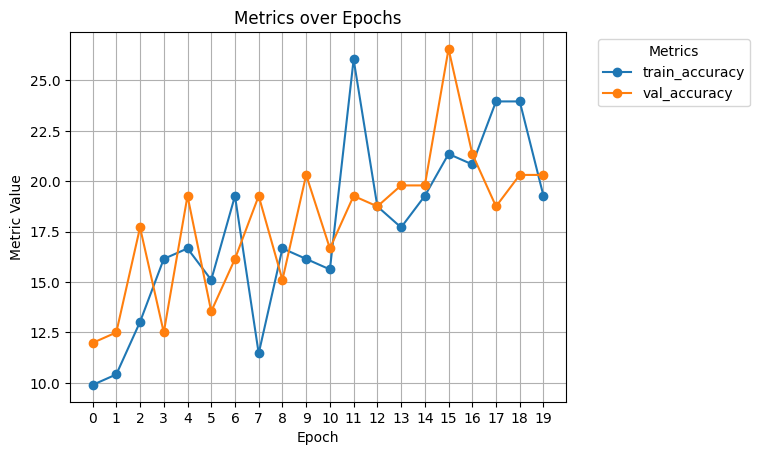

In [10]:
plotter = SimplePlotter(logger.experiment.run.metrics_file_path)
plotter.plot_metrics(by="accuracy")